In [4]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [5]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(60000, 28, 28, 1) / 255.0
x_test = x_test.reshape(10000, 28, 28, 1) / 255.0
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPool2D(2, 2),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPool2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
]
)

In [6]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 11, 32)        9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                51264     
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)               

In [7]:

loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=loss_fn,
              metrics=['accuracy'])

In [8]:
history=model.fit(x_train, y_train, epochs=10,validation_data=(x_test,y_test))

Epoch 1/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.5648 - accuracy: 0.9016 - val_loss: 1.4898 - val_accuracy: 0.9722
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.4976 - accuracy: 0.9647 - val_loss: 1.4834 - val_accuracy: 0.9782
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.4893 - accuracy: 0.9724 - val_loss: 1.4794 - val_accuracy: 0.9826
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.4841 - accuracy: 0.9779 - val_loss: 1.4752 - val_accuracy: 0.9863
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.4813 - accuracy: 0.9803 - val_loss: 1.4749 - val_accuracy: 0.9865
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.4792 - accuracy: 0.9824 - val_loss: 1.4767 - val_accuracy: 0.9844
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.4779 - accuracy: 0.9836 - val_loss: 1.4743 - val_accuracy:

In [9]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0003),
              loss=loss_fn,
              metrics=['accuracy'])

In [10]:
history=model.fit(x_train, y_train, epochs=10,validation_data=(x_test,y_test))

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.4719 - accuracy: 0.9893 - val_loss: 1.4707 - val_accuracy: 0.9900
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.4701 - accuracy: 0.9913 - val_loss: 1.4696 - val_accuracy: 0.9918
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.4694 - accuracy: 0.9919 - val_loss: 1.4689 - val_accuracy: 0.9924
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.4693 - accuracy: 0.9921 - val_loss: 1.4698 - val_accuracy: 0.9914
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.4688 - accuracy: 0.9924 - val_loss: 1.4692 - val_accuracy: 0.9919
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.4687 - accuracy: 0.9926 - val_loss: 1.4692 - val_accuracy: 0.9919
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.4684 - accuracy: 0.9930 - val_loss: 1.4693 - val_accuracy:

In [11]:

model.save("saved_model/new_model")


Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: saved_model/new_model/assets


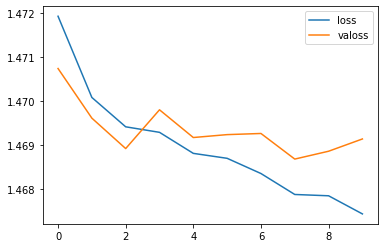

In [12]:
plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['val_loss'],label='valoss')
plt.legend()
plt.show()

In [13]:
!zip -r /content/file.zip /content/saved_model

  adding: content/saved_model/ (stored 0%)
  adding: content/saved_model/new_model/ (stored 0%)
  adding: content/saved_model/new_model/saved_model.pb (deflated 89%)
  adding: content/saved_model/new_model/variables/ (stored 0%)
  adding: content/saved_model/new_model/variables/variables.data-00001-of-00002 (deflated 12%)
  adding: content/saved_model/new_model/variables/variables.index (deflated 66%)
  adding: content/saved_model/new_model/variables/variables.data-00000-of-00002 (deflated 80%)
  adding: content/saved_model/new_model/assets/ (stored 0%)
